In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

%matplotlib inline

# Fashion MNIST

In [2]:
train_df = pd.read_csv('./data/fashion-mnist_train.csv')
test_df = pd.read_csv('./data/fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
class_map = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
             5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] /255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

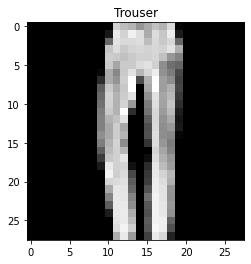

In [4]:
def display_image(data, label, class_map, i=0):
    image = data[i].reshape((28, 28))
    plt.imshow(image, cmap='gray')
    plt.title(class_map[label[i]])
    plt.show()

display_image(x_test, y_test, class_map, i=1)

In [5]:
x_train.shape

(60000, 784)

## SVM

In [6]:
model = SVC(C=10)
model.fit(x_train, y_train)

SVC(C=10)

In [7]:
model.score(x_test, y_test)

0.9083

# Fourier transform as features

In [23]:
import cv2

def get_spectrum(image):
    dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])
    if 0 in magnitude:
        for i, row in enumerate(magnitude):
            for j, pixel in enumerate(row):
                if pixel == 0:
                    magnitude[i, j] = 1e-3
    magnitude_spectrum = 20*np.log(magnitude) #magnitude, spectrum, energy
    
    return magnitude_spectrum

def display_fourier(image, cmap='gray'):
    spectrum = get_spectrum(image)
    #show the result
    plt.figure(figsize=(6.4*4, 4.8*4), constrained_layout=False)
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray'), plt.title("image")
    plt.subplot(1,2, 2)
    plt.imshow(spectrum, cmap=cmap), plt.title("fourier spectrum")
    plt.axis('off')
    plt.show()

In [9]:
import warnings

In [10]:
def convert2spectrum(data):
    data_fourier = np.zeros((len(data), 784))
    for i, image in enumerate(data):
        image = image.reshape((28, 28))
        spectrum = get_spectrum(image)
        
        data_fourier[i] = spectrum.reshape((-1))
    return data_fourier

In [12]:
x_train_fourier = convert2spectrum(x_train)

In [13]:
x_test_fourier = convert2spectrum(x_test)

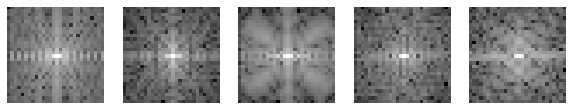

<Figure size 432x288 with 0 Axes>

In [34]:
cls = 0
obj = np.where(y_train==cls)

fig = plt.figure(figsize=(10,5))
columns = 5
rows = 1
for i in range(1, columns*rows + 1):
    img = x_train_fourier[obj[0][i]].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig('fourier.png')

## SVM on fourier transform

In [15]:
model = SVC(C=5)
model.fit(x_train_fourier, y_train)

model.score(x_test_fourier, y_test)

0.8415

In [16]:
len(x_test)

10000

# Canny edge detection as features

In [17]:
def apply_canny(data):
    data_edge = np.zeros((len(data), 784))
    for i, image in enumerate(data):
        image = image.reshape((28, 28))
        edge = cv2.Canny(np.uint8(image), 100, 100)
        data_edge[i] = edge.reshape((-1))
        
    return data_edge

In [18]:
x_train = train_data[:, 1:]
y_train = train_data[:, 0]

x_test = test_data[:, 1:]
y_test = test_data[:, 0]

In [19]:
x_train_edge = apply_canny(x_train)
x_test_edge = apply_canny(x_test)

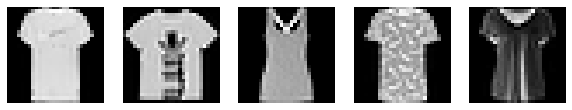

<Figure size 432x288 with 0 Axes>

In [30]:
cls=0
obj = np.where(y_train==cls)

fig = plt.figure(figsize=(10,5))
columns = 5
rows = 1
for i in range(1, columns*rows + 1):
    img = x_train[obj[0][i]].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig('original.png')

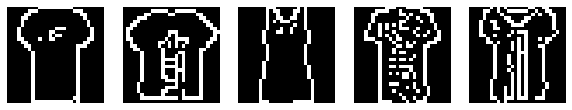

<Figure size 432x288 with 0 Axes>

In [35]:
cls = 0
obj = np.where(y_train==cls)

fig = plt.figure(figsize=(10,5))
columns = 5
rows = 1
for i in range(1, columns*rows + 1):
    img = x_train_edge[obj[0][i]].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig('canny.png')

In [22]:
model = SVC(C=5)
model.fit(x_train_edge, y_train)
model.score(x_test_edge, y_test)

0.8824